In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the database file name
DB_FILE = "sales_data.db"

In [4]:
# --- 1. Create and Populate the Database ---

# Delete the database file if it already exists to start fresh
if os.path.exists(DB_FILE):
    os.remove(DB_FILE)

# Connect to the SQLite database (this will create the file)
conn = sqlite3.connect(DB_FILE)
cursor = conn.cursor()

# Create the 'sales' table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

# Insert some sample data into the table
sales_data = [
    ('Laptop', 10, 1200.50),
    ('Mouse', 50, 25.00),
    ('Keyboard', 30, 75.75),
    ('Laptop', 5, 1150.00),
    ('Monitor', 20, 300.00),
    ('Mouse', 25, 27.50)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)

# Commit the changes and close the initial connection
conn.commit()
conn.close()

print(f"Database '{DB_FILE}' created and populated successfully.")

Database 'sales_data.db' created and populated successfully.


In [5]:
# --- 2. Query the Database and Analyze Data ---

# Connect to the newly created database
conn = sqlite3.connect(DB_FILE)

# Define the SQL query to get the sales summary
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM
    sales
GROUP BY
    product
ORDER BY
    revenue DESC
"""

# Execute the query and load the results into a pandas DataFrame
sales_summary_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


--- Sales Summary ---
    product  total_quantity  revenue
0    Laptop              15  17755.0
1   Monitor              20   6000.0
2  Keyboard              30   2272.5
3     Mouse              75   1937.5

Bar chart saved as 'sales_revenue_chart.png'


<Figure size 1000x600 with 0 Axes>

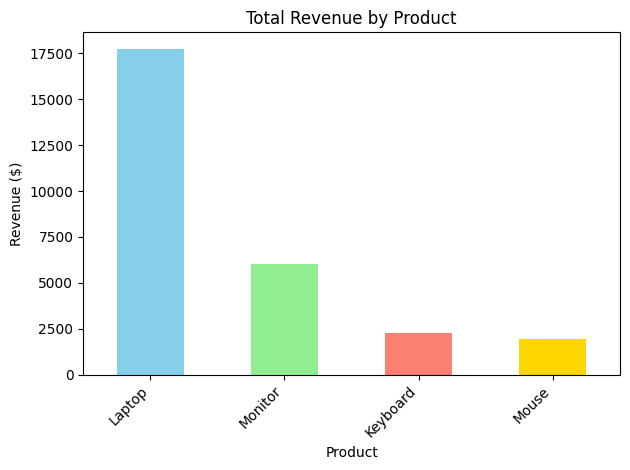

In [6]:
# --- 3. Display and Visualize the Results ---

# Display the summary data using print()
print("\n--- Sales Summary ---")
print(sales_summary_df)

# Create a bar chart of the revenue by product
plt.figure(figsize=(10, 6))
ax = sales_summary_df.plot(kind='bar', x='product', y='revenue', legend=False,
                           title='Total Revenue by Product',
                           color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax.set_xlabel("Product")
ax.set_ylabel("Revenue ($)")
ax.set_xticklabels(sales_summary_df['product'], rotation=45, ha='right')
plt.tight_layout()

# Save the chart to a file
plt.savefig("sales_revenue_chart.png")

print("\nBar chart saved as 'sales_revenue_chart.png'")

# Display the chart
plt.show()